# Machine Learning on gut microbiota of patients with Colorectal cancer (3): Exploratory Data Analysis

Now that we have a good intuitive sense of the data, Next step involves taking a closer look at attributes and data values. In this section, I am getting familiar with the data, which will provide useful knowledge for data pre-processing.

## Objectives of Data Exploration

Exploratory data analysis (EDA) is a very important step which takes place after feature engineering and acquiring data and it should be done before any modeling. This is because it is very important for a data scientist to be able to understand the nature of the data without making assumptions. The results of data exploration can be extremely useful in grasping the structure of the data, the distribution of the values, and the presence of extreme values and interrelationships within the data set.

> **The purpose of EDA is:**
* To use summary statistics and visualizations to better understand data, 
* Finding clues about the tendencies of the data, its quality and to formulate assumptions and the hypothesis of our analysis
* For data preprocessing to be successful, it is essential to have an overall picture of your data
Basic statistical descriptions can be used to identify properties of the data and highlight which data values should be treated as **noise or outliers.** 

Next step is to explore the data. There are two approached used to examine the data using:

1. ***Descriptive statistics*** is the process of condensing key characteristics of the data set into simple numeric metrics. Some of the common metrics used are mean, standard deviation, and correlation. 
	
2. ***Visualization*** is the process of projecting the data, or parts of it, into Cartesian space or into abstract images. In the data mining process, data exploration is leveraged in many different steps including preprocessing, modeling, and interpretation of results. 


## Descriptive statistics
Summary statistics are measurements meant to describe data. In the field of descriptive statistics, there are many [summary measurements](http://www.saedsayad.com/numerical_variables.htm)

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import norm
import seaborn as sns
import statistics as st



In [2]:
data = pd.read_table('./dataset/MergeData.tsv', sep="\t", index_col=0)

data.head()

,disease,s__Bacteroides_plebeius,s__Bacteroides_dorei,s__Faecalibacterium_prausnitzii,s__Eubacterium_eligens,s__Bacteroides_ovatus,s__Parabacteroides_distasonis,s__Ruminococcus_gnavus,s__Phascolarctobacterium_faecium,s__Bacteroides_uniformis,...,s__Bacteroides_finegoldii,s__Haemophilus_sp_HMSC71H05,s__Clostridium_saccharolyticum,s__Streptococcus_anginosus_group,s__Streptococcus_sp_A12,s__Klebsiella_pneumoniae,s__Bacteroides_coprocola,s__Ruminococcus_lactaris,s__Turicimonas_muris,s__Proteobacteria_bacterium_CAG_139
SampleID,,,,,,,,,,,,,,,,,,,,,
SAMD00114718,healthy,46509517,8249892,3696318,3265545,2871853,2327330,1920299,1506928,1371476,...,0,0,0,0,0,0,0,0,0,0
SAMD00114719,healthy,5334509,230275,2053756,182914,289955,89183,35688,0,729206,...,0,0,0,0,0,0,0,0,0,0
SAMD00114720,healthy,6868169,4054008,3267707,0,1097263,990122,1490407,0,1272701,...,0,0,0,0,0,0,0,0,0,0
SAMD00114721,healthy,1029678,2029259,661965,114447,110111,2705778,59274,0,940124,...,0,0,0,0,0,0,0,0,0,0
SAMD00114722,CRC,7520,2318235,350665,546829,564558,2529966,4608830,0,1888066,...,512018,137432,71548,15826,0,0,0,0,0,0


In [3]:
#basic descriptive statistics
data.describe()

,s__Bacteroides_plebeius,s__Bacteroides_dorei,s__Faecalibacterium_prausnitzii,s__Eubacterium_eligens,s__Bacteroides_ovatus,s__Parabacteroides_distasonis,s__Ruminococcus_gnavus,s__Phascolarctobacterium_faecium,s__Bacteroides_uniformis,s__Bifidobacterium_longum,...,s__Bacteroides_finegoldii,s__Haemophilus_sp_HMSC71H05,s__Clostridium_saccharolyticum,s__Streptococcus_anginosus_group,s__Streptococcus_sp_A12,s__Klebsiella_pneumoniae,s__Bacteroides_coprocola,s__Ruminococcus_lactaris,s__Turicimonas_muris,s__Proteobacteria_bacterium_CAG_139
count,5.040000e+02,5.040000e+02,5.040000e+02,5.040000e+02,5.040000e+02,5.040000e+02,5.040000e+02,5.040000e+02,5.040000e+02,5.040000e+02,...,5.040000e+02,5.040000e+02,504.000000,504.000000,504.000000,5.040000e+02,5.040000e+02,5.040000e+02,504.000000,5.040000e+02
mean,2.139221e+06,1.853404e+06,1.639697e+06,7.471533e+05,5.702796e+05,1.189482e+06,8.616634e+05,8.704456e+04,2.655816e+06,4.948624e+05,...,1.896052e+05,1.434993e+04,16513.160714,9621.785714,1705.916667,2.354459e+05,4.195657e+05,1.364957e+05,3334.486111,4.703426e+04
std,4.689115e+06,3.560063e+06,1.698016e+06,1.656732e+06,1.403095e+06,2.045147e+06,2.860133e+06,2.014462e+05,3.023979e+06,1.583632e+06,...,6.347103e+05,1.339195e+05,63994.560492,37684.680559,9572.428444,1.500337e+06,1.146908e+06,4.313418e+05,18921.337212,2.234608e+05
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,0.000000e+00,0.000000e+00,3.653348e+05,0.000000e+00,9.511500e+03,1.316185e+05,6.770250e+03,0.000000e+00,5.021035e+05,2.227000e+03,...,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
50%,0.000000e+00,1.541615e+05,1.108265e+06,1.269250e+04,1.376850e+05,5.198215e+05,1.254780e+05,0.000000e+00,1.617164e+06,9.181750e+04,...,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
75%,2.154796e+06,2.206212e+06,2.411498e+06,8.205942e+05,4.613352e+05,1.451609e+06,6.393728e+05,6.190750e+04,3.725370e+06,3.613370e+05,...,4.488500e+03,0.000000e+00,0.000000,1210.250000,0.000000,1.237500e+03,1.618850e+04,0.000000e+00,0.000000,5.255000e+02
max,4.650952e+07,2.704303e+07,1.033825e+07,2.099930e+07,2.080088e+07,2.867909e+07,4.852190e+07,1.819512e+06,1.865031e+07,2.360833e+07,...,5.143085e+06,2.870102e+06,546273.000000,494519.000000,152204.000000,2.599798e+07,7.396682e+06,5.114972e+06,290556.000000,2.872330e+06


In [4]:
data.skew()

/var/folders/82/kf2cy4v112b374jb5xcvmwh40000gn/T/ipykernel_71511/1188251951.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.skew()


s__Bacteroides_plebeius                 3.829753
s__Bacteroides_dorei                    3.183878
s__Faecalibacterium_prausnitzii         1.662481
s__Eubacterium_eligens                  5.588910
s__Bacteroides_ovatus                   7.612611
                                         ...    
s__Klebsiella_pneumoniae               11.966032
s__Bacteroides_coprocola                3.615256
s__Ruminococcus_lactaris                5.572388
s__Turicimonas_muris                   11.987903
s__Proteobacteria_bacterium_CAG_139     7.546497
Length: 151, dtype: float64

 >The skew result show a positive (right) or negative (left) skew. Values closer to zero show less skew.
 From the results, we can see that the relative abundance of most taxa are right skew. Since this, we should use CLR transformation to normalize the data 

In [5]:
data.disease.unique()

array(['healthy', 'CRC'], dtype=object)

In [6]:
# Group by disease and review the output.
diag_gr = data.groupby('disease', axis=0)
pd.DataFrame(diag_gr.size(), columns=['# of observations'])

,# of observations
disease,
CRC,258
healthy,246


Check binary encoding from **01.DataClean** to confirm the coversion of the disease categorical data into numeric, where
* CRC = 1 (indicates prescence of disease)
* healthy = 0 (indicates control)

##### **Observation**

> *258 observations indicating the prescence of CRC and 111 show control*

Lets confirm this, by ploting the histogram

## Unimodal Data Visualizations

One of the main goals of visualizing the data here is to observe which features are most helpful in predicting CRC or healthy. The other is to see general trends that may aid us in model selection and hyper parameter selection.

Apply 4 techniques that you can use to understand each attribute of your dataset independently.
* Histograms.
* Density Plots.
* Box and Whisker Plots.
* Scatter Plots

[Text(0, 0, '246'), Text(0, 0, '258')]

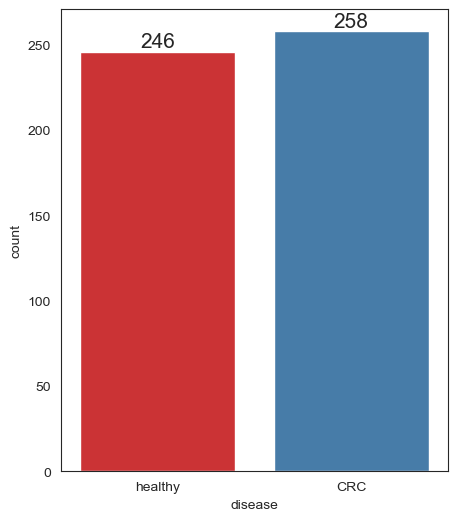

In [7]:
sns.set_style("white")
sns.set_context({"figure.figsize": (5, 6)})
ax = sns.countplot(x = 'disease', data = data, label = "Count", palette = "Set1")
ax.bar_label(ax.containers[0], fontsize=15)

## Visualise distribution of data via histograms

Histograms are commonly used to visualize numerical variables. A histogram is similar to a bar graph after the values of the variable are grouped (binned) into a finite number of intervals (bins).

Histograms group data into bins and provide you a count of the number of observations in each bin. From the shape of the bins you can quickly get a feeling for whether an attribute is Gaussian, skewed or even has an exponential distribution. It can also help you see possible outliers.

### Separate columns into smaller dataframes to perform visualization

In [8]:
data["SampleID"] = data.index.values  # convert rownames into id column
data_id_diag = data.loc[:, ["SampleID", "disease"]]
data_diag = data.loc[:, ["disease"]]

data_species = data.iloc[:, 1:30]

print(data_id_diag.columns)
print(data_species.columns)

Index(['SampleID', 'disease'], dtype='object')
Index(['s__Bacteroides_plebeius', 's__Bacteroides_dorei',
       's__Faecalibacterium_prausnitzii', 's__Eubacterium_eligens',
       's__Bacteroides_ovatus', 's__Parabacteroides_distasonis',
       's__Ruminococcus_gnavus', 's__Phascolarctobacterium_faecium',
       's__Bacteroides_uniformis', 's__Bifidobacterium_longum',
       's__Agathobaculum_butyriciproducens', 's__Collinsella_aerofaciens',
       's__Clostridium_sp_CAG_58', 's__Escherichia_coli',
       's__Blautia_wexlerae', 's__Fusicatenibacter_saccharivorans',
       's__Clostridium_bolteae', 's__Flavonifractor_plautii',
       's__Eggerthella_lenta', 's__Eubacterium_ramulus',
       's__Clostridium_bolteae_CAG_59', 's__Streptococcus_salivarius',
       's__Coprococcus_catus', 's__Erysipelatoclostridium_ramosum',
       's__Streptococcus_parasanguinis', 's__Haemophilus_parainfluenzae',
       's__Holdemania_filiformis', 's__Turicibacter_sanguinis',
       's__Blautia_sp_CAG_257'],

### Histogram the 30 species

Since there are 193 species in the dataset, we just display the 30 species to infer the distribution of relative abundance

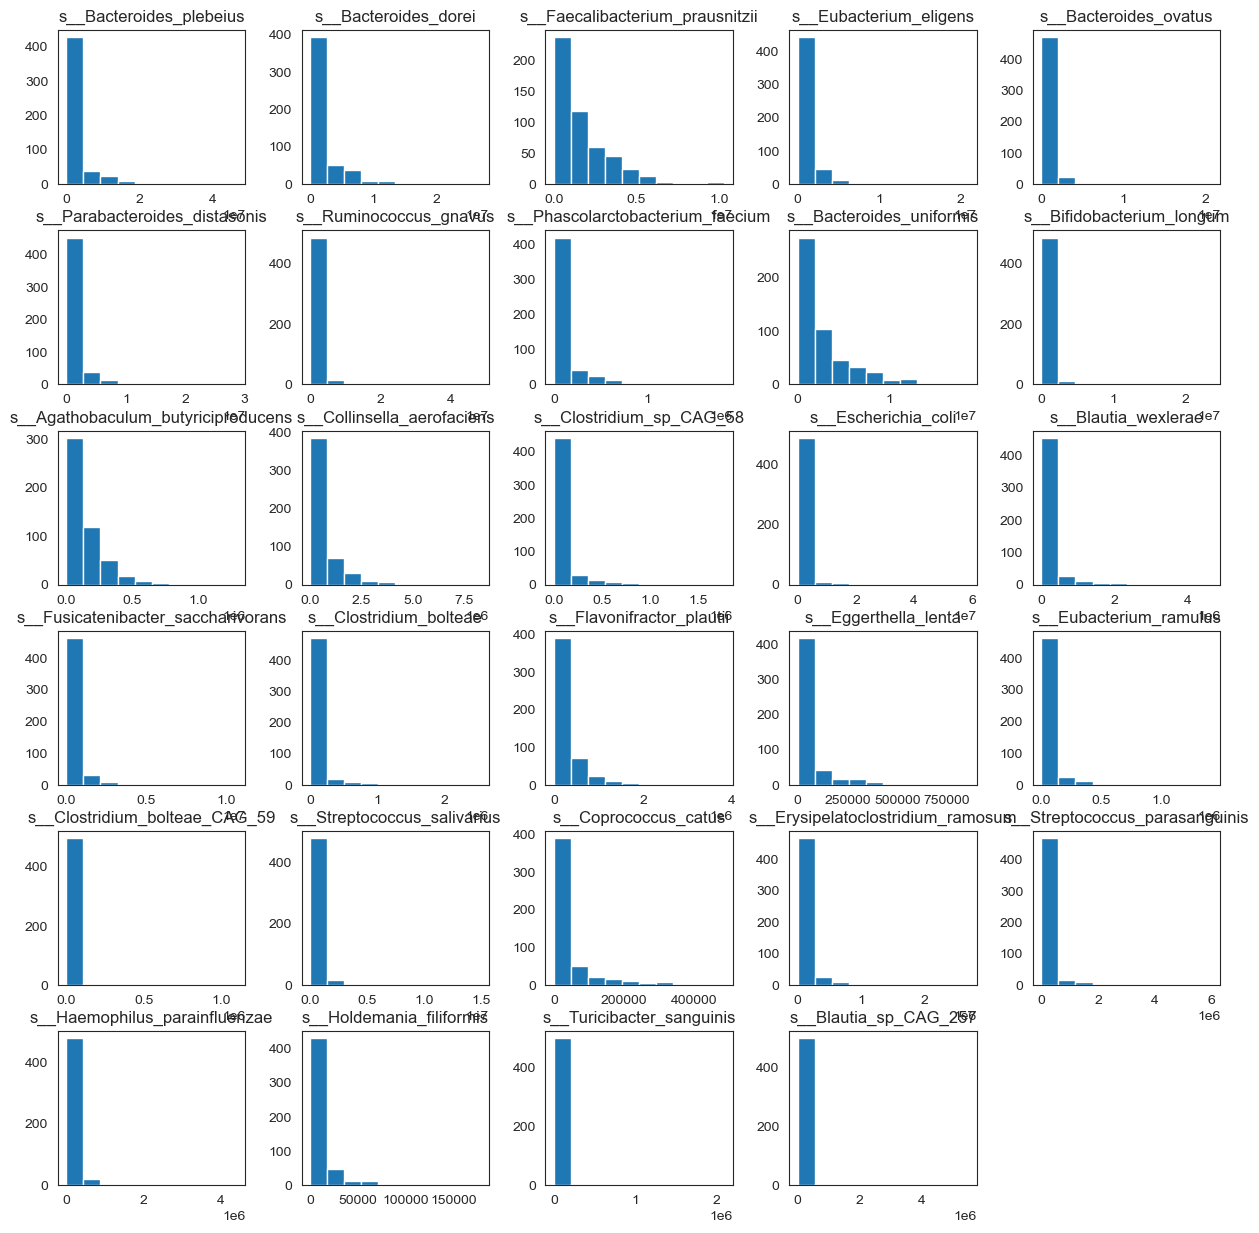

In [9]:
#Plot histograms of species variables
hist_species = data_species.hist(bins=10, figsize=(15, 15), grid=False)

<AxesSubplot: >

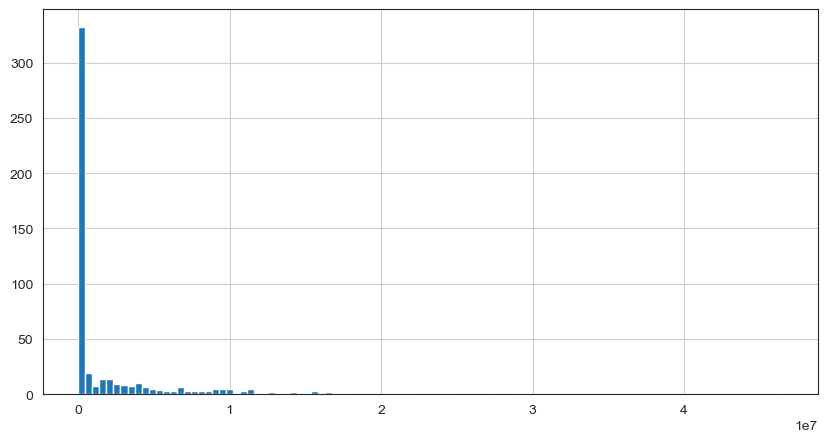

In [11]:
#Any individual histograms, use this:
data_species['s__Bacteroides_plebeius'].hist(bins=100, figsize=(10, 5))

### __Observation__ 

>We can see that perhaps the attributes of all the species are skew distribution. Since many machine learning techniques assume a Gaussian univariate distribution on the input variables. Therefore, we need to normalize the compositional microbiota data into Gaussian distribution by using the **centered log-ratio (clr) transformation**.


## Visualize distribution of data via density plots

Density plot is a representation of the distribution of a numeric variable. It uses a kernel density estimate to show the probability density function of the variable.

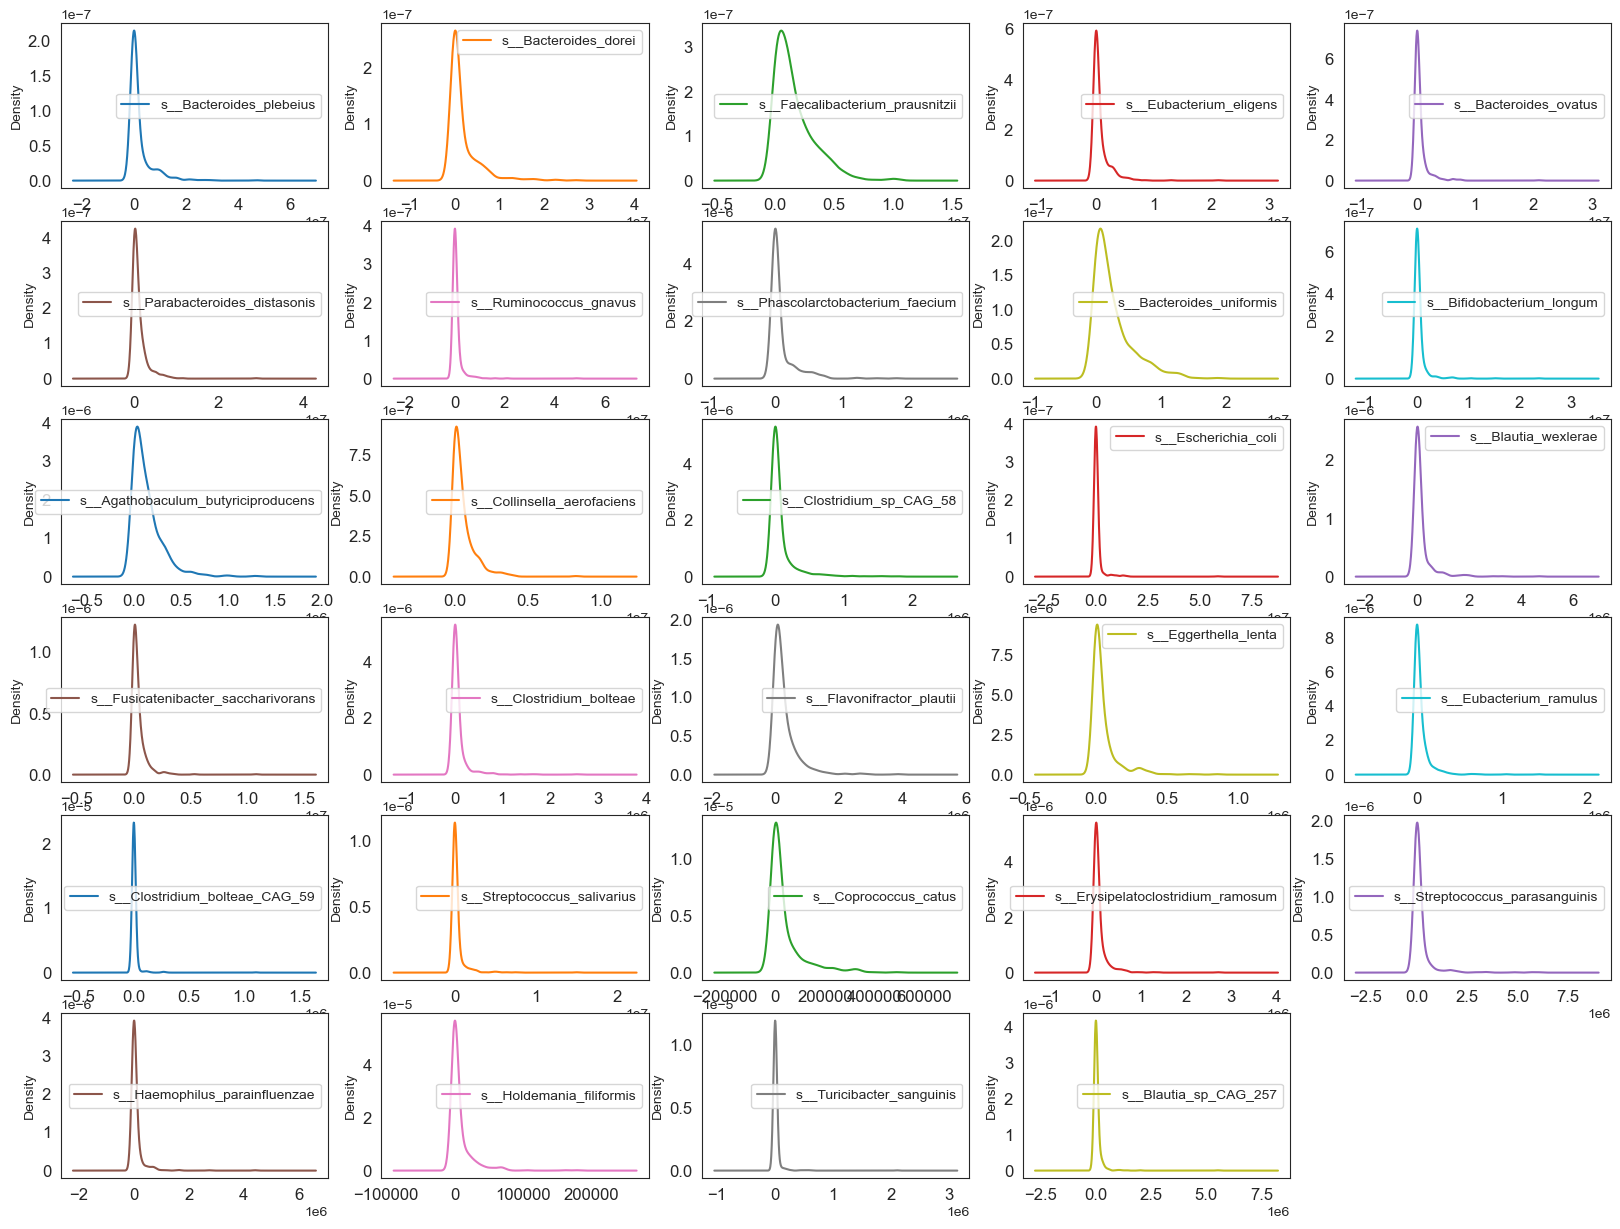

In [12]:
#Density Plots
Density_species = data_species.plot(
        kind='density', 
        subplots=True, 
        layout=(6, 5), 
        sharex=False, 
        sharey=False,
        fontsize=12, 
        figsize=(20, 15))

### Observation
>We can see that perhaps the attributes of all the species are **zero-inflated distribution** which means that there are more than 50% zeros containing **Structure or Outlier zeros** in the data. Since many machine learning techniques assume a Gaussian univariate distribution on the input variables. Therefore, we need to normalize the compositional and sparsity microbiota data into Gaussian distribution by using the **centered log-ratio (clr) transformation** with a pseudo count of 1.

## Visualise distribution of data via box plots

Box plot is a method for graphically demonstrating the locality, spread and skewness groups of numerical data through their quartiles

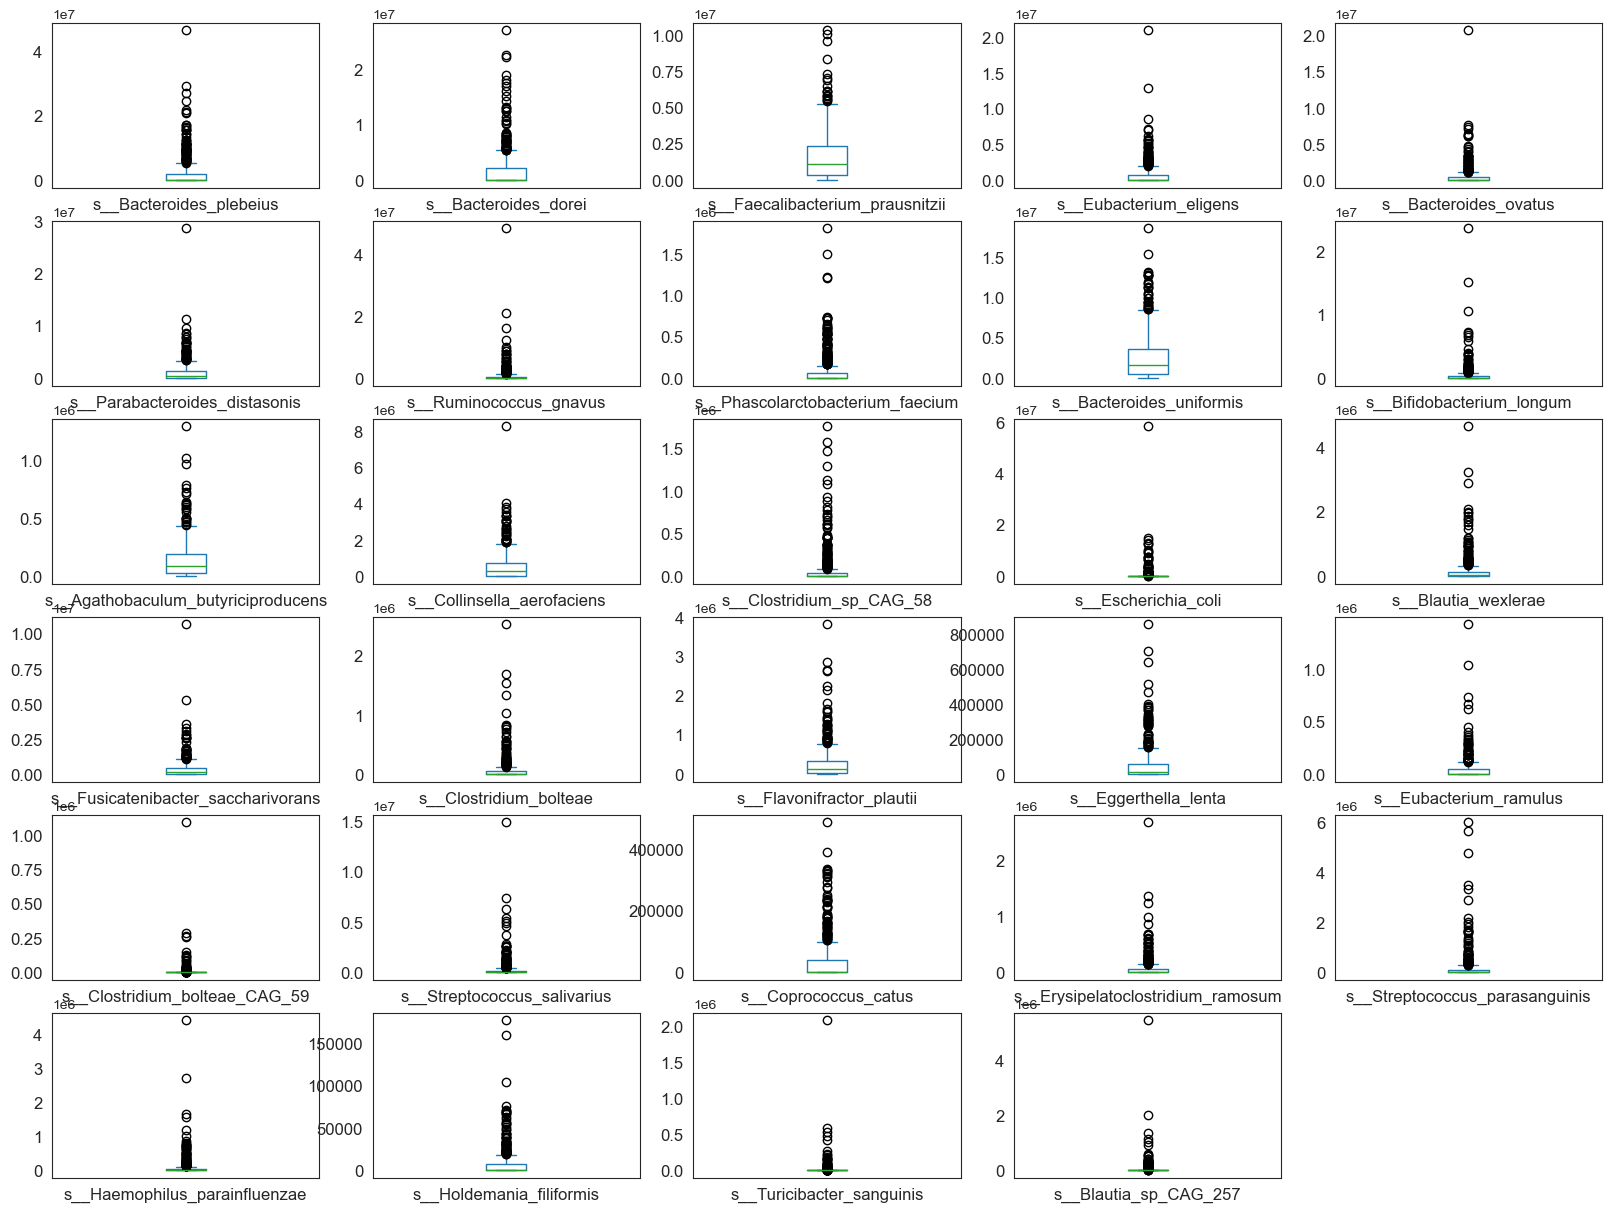

In [13]:
# box and whisker plots
Boxplot_species = data_species.plot(
        kind='box', 
        subplots=True, 
        layout=(6, 5), 
        sharex=False, 
        sharey=False,
        fontsize=12,
        figsize=(20, 15))

### Observation
>We can see that perhaps the attributes of all the species are **zero-inflated distribution** which means that there are more than 50% zeros containing **Structure or Outlier zeros** in the data. Since many machine learning techniques assume a Gaussian univariate distribution on the input variables. Therefore, we need to normalize the compositional and sparsity microbiota data into Gaussian distribution by using the **centered log-ratio (clr) transformation** with a pseudo count of 1.

## Visualise distribution of data via scatter plot by using Standard Deviation and Mean as X and Y axis

Scatter plot is a method for graphically displaying the linearity between X and Y values.

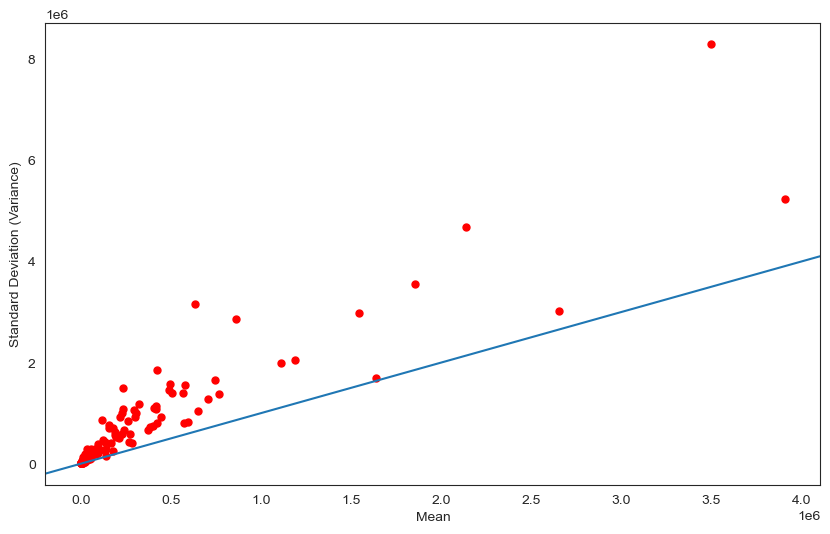

In [15]:
data_species_v2 = data.iloc[:, 1:152]

x_Mean = np.array(data_species_v2.apply(st.mean, axis=0))
y_SD = np.array(data_species_v2.apply(st.stdev, axis=0))

f, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x_Mean, y_SD, color='r', marker='.', s=100)
ax.axline((0.1, 0.1), slope=1)
ax.set(xlabel="Mean", ylabel="Standard Deviation (Variance)")

plt.show()

### Observation
>We can see that perhaps the attributes of all the species are **Overdispersion** which means that **Variance** greater than **Mean**. Since many machine learning techniques assume a Gaussian univariate distribution on the input variables. Therefore, we need to normalize the compositional and sparsity microbiota data into Gaussian distribution by using the **centered log-ratio (clr) transformation** with a pseudo count of 1.

## Multimodal Data Visualizations
* Scatter plots
* Correlation matrix

### Correlation matrix

<AxesSubplot: title={'center': 'CRC Species Correlation'}>

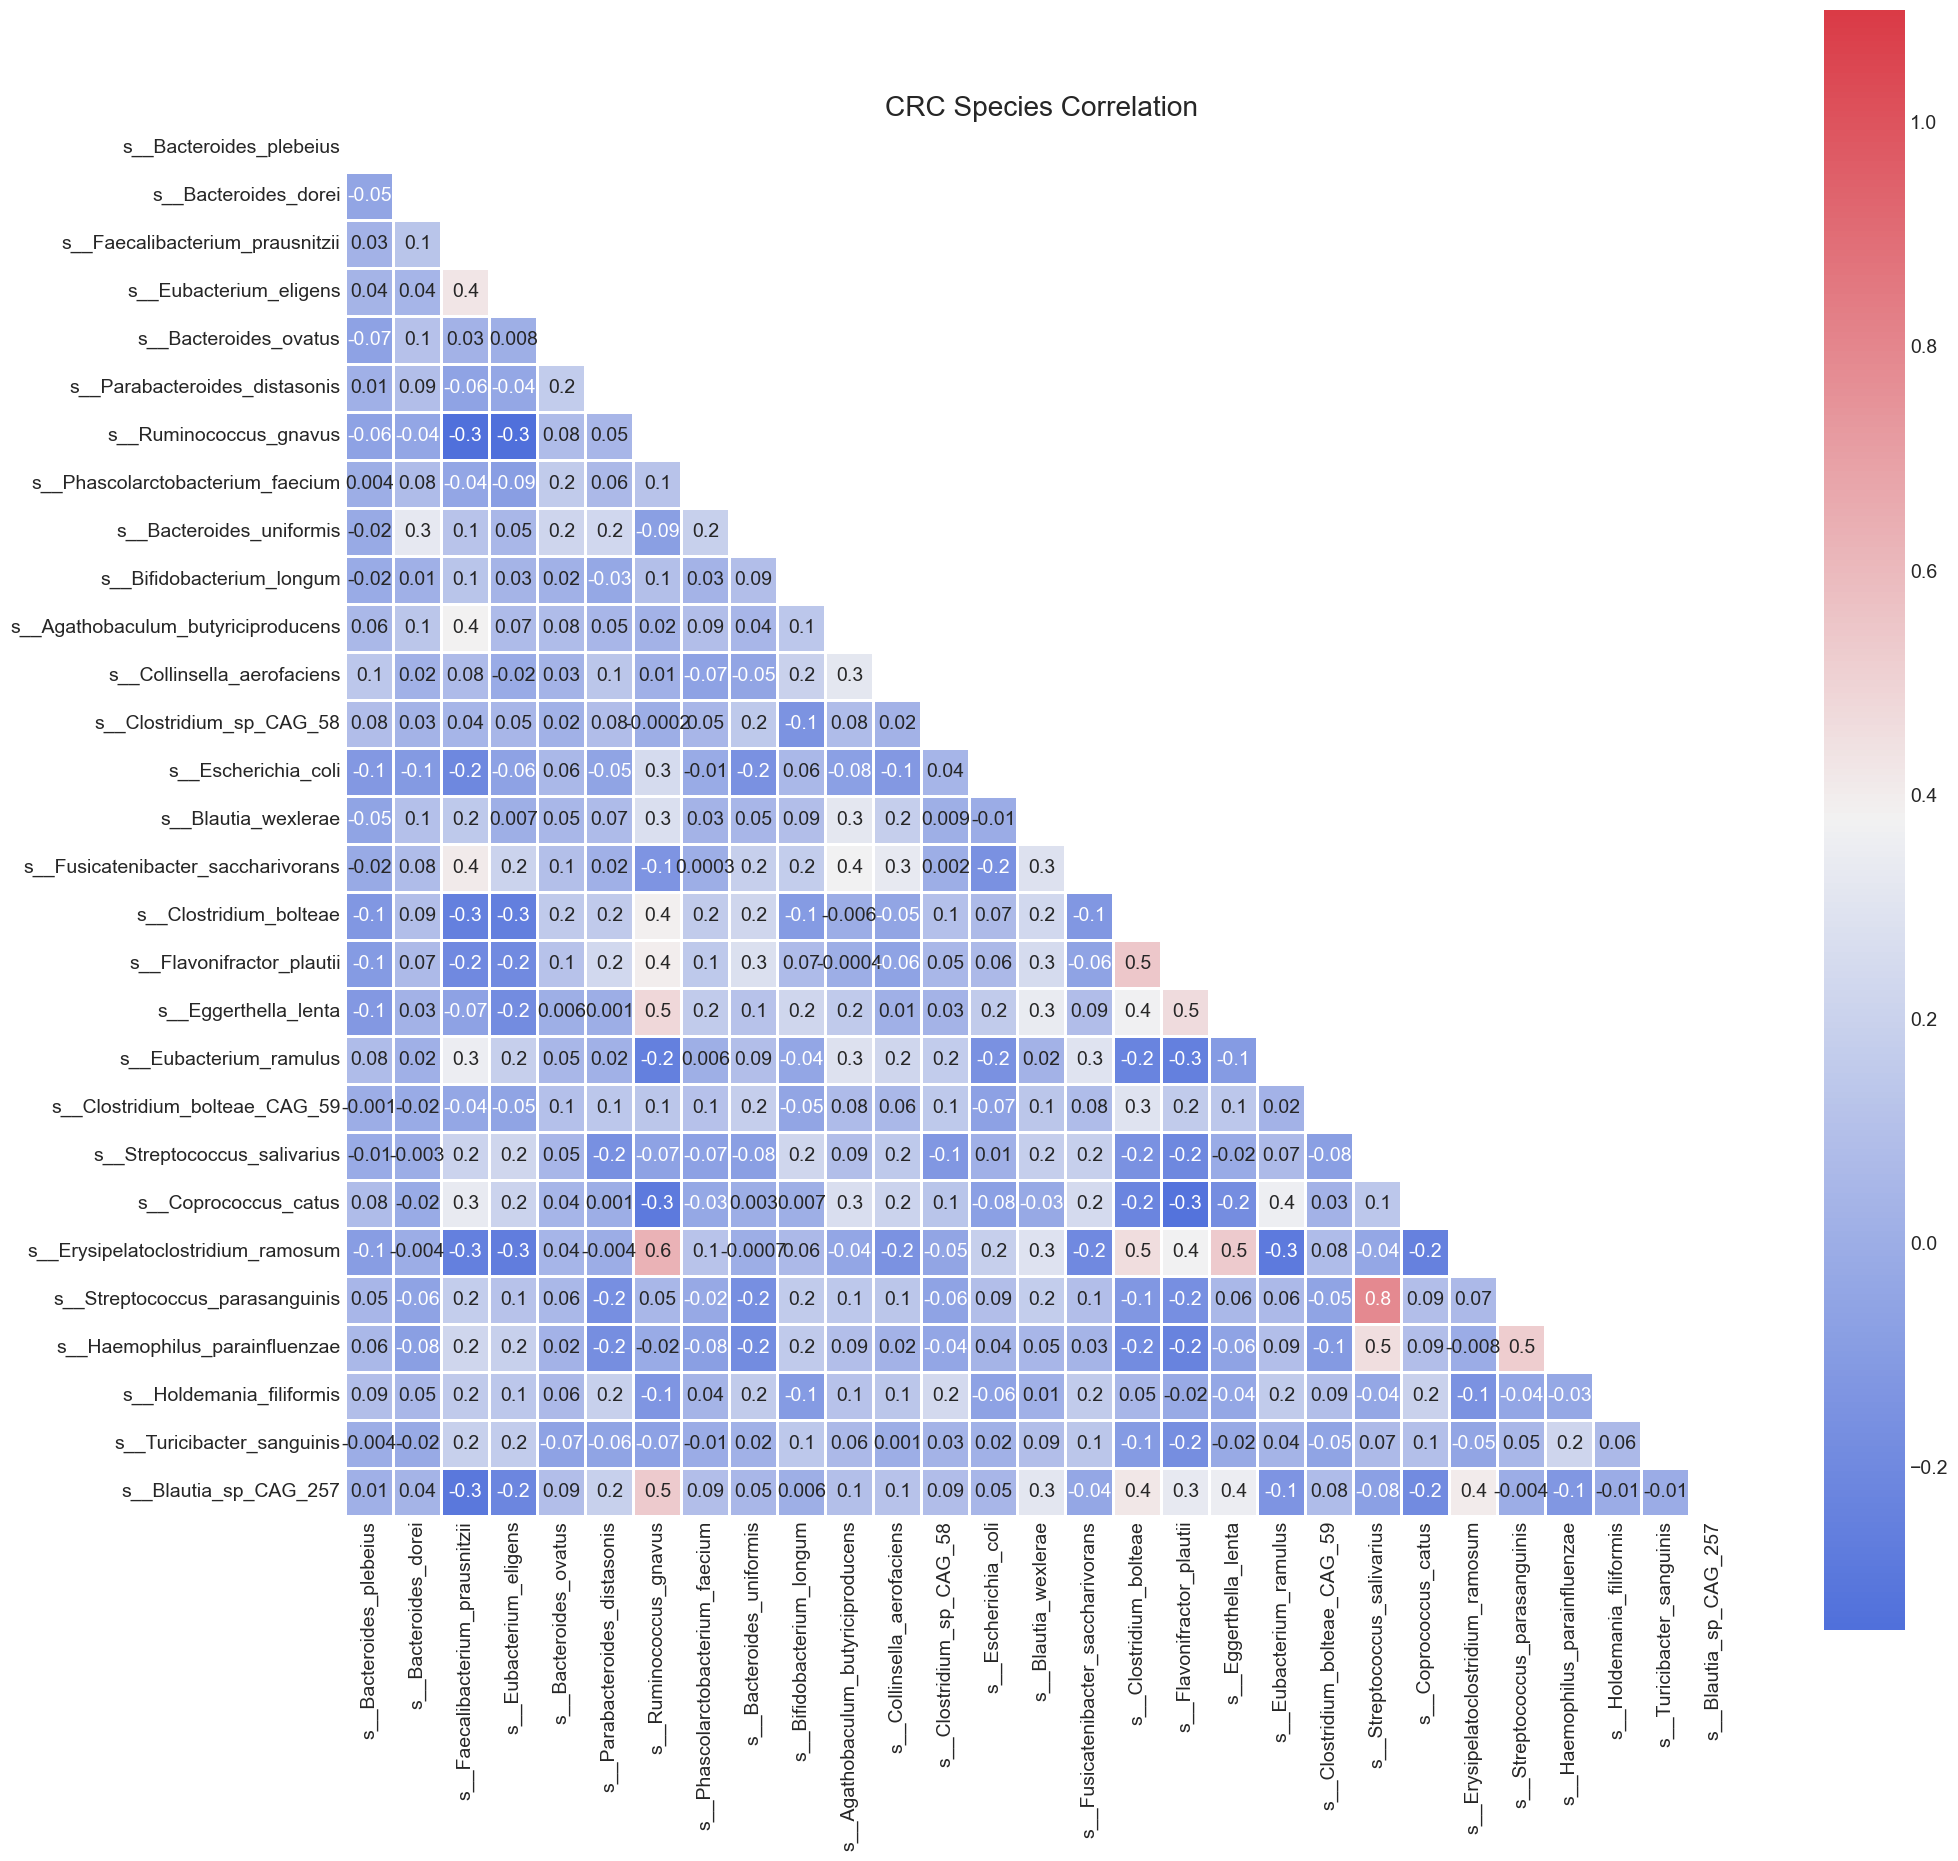

In [17]:
# plot correlation matrix
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

plt.style.use('fivethirtyeight')
sns.set_style("white")

# Compute the correlation matrix
corr = data_species.corr(method="spearman")

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype='bool')
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(20, 20))
plt.title('CRC Species Correlation')

# Generate a custom diverging colormap
cmap = sns.diverging_palette(260, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, 
            vmax=1.1, 
            square='square', 
            cmap=cmap, 
            mask=mask, 
            ax=ax,
            annot=True, 
            fmt='.1g',
            linewidths=2)

### Observation:
We can see Spearman correlation coefficients from -0.3 to 0.8
* The relative abundance of *s__Streptococcus_parasanguinis* has a strong positive correlation (rho >= 0.8) with relative abundance of *s__Streptococcus_salivarius*;
* Likewise, we see another positive correlation (rho >= 0.6) between *s__Erisipelatoclostridium_ramosum* and *s__Ruminococcus_gnavus*.
* Some paramters are sightly positive corrlated (r between 0.2-0.5) are *s__Erisipelatoclostridium_ramosum* and *s_Eggerthella_lenta* etc

In [20]:
data

,disease,s__Bacteroides_plebeius,s__Bacteroides_dorei,s__Faecalibacterium_prausnitzii,s__Eubacterium_eligens,s__Bacteroides_ovatus,s__Parabacteroides_distasonis,s__Ruminococcus_gnavus,s__Phascolarctobacterium_faecium,s__Bacteroides_uniformis,...,s__Haemophilus_sp_HMSC71H05,s__Clostridium_saccharolyticum,s__Streptococcus_anginosus_group,s__Streptococcus_sp_A12,s__Klebsiella_pneumoniae,s__Bacteroides_coprocola,s__Ruminococcus_lactaris,s__Turicimonas_muris,s__Proteobacteria_bacterium_CAG_139,SampleID
SampleID,,,,,,,,,,,,,,,,,,,,,
SAMD00114718,healthy,46509517,8249892,3696318,3265545,2871853,2327330,1920299,1506928,1371476,...,0,0,0,0,0,0,0,0,0,SAMD00114718
SAMD00114719,healthy,5334509,230275,2053756,182914,289955,89183,35688,0,729206,...,0,0,0,0,0,0,0,0,0,SAMD00114719
SAMD00114720,healthy,6868169,4054008,3267707,0,1097263,990122,1490407,0,1272701,...,0,0,0,0,0,0,0,0,0,SAMD00114720
SAMD00114721,healthy,1029678,2029259,661965,114447,110111,2705778,59274,0,940124,...,0,0,0,0,0,0,0,0,0,SAMD00114721
SAMD00114722,CRC,7520,2318235,350665,546829,564558,2529966,4608830,0,1888066,...,137432,71548,15826,0,0,0,0,0,0,SAMD00114722
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SAMD00165029,healthy,0,5136959,1948287,400810,279863,2204288,571050,1214069,1241872,...,0,371062,0,0,0,5218937,761927,1368,15683,SAMD00165029
SAMD00165030,healthy,6311760,18113,0,578608,19714,445646,195034,0,1183132,...,0,0,0,660,0,0,0,0,0,SAMD00165030
SAMD00165031,healthy,0,0,152752,0,361361,0,709555,111347,0,...,0,0,0,0,0,0,0,0,0,SAMD00165031


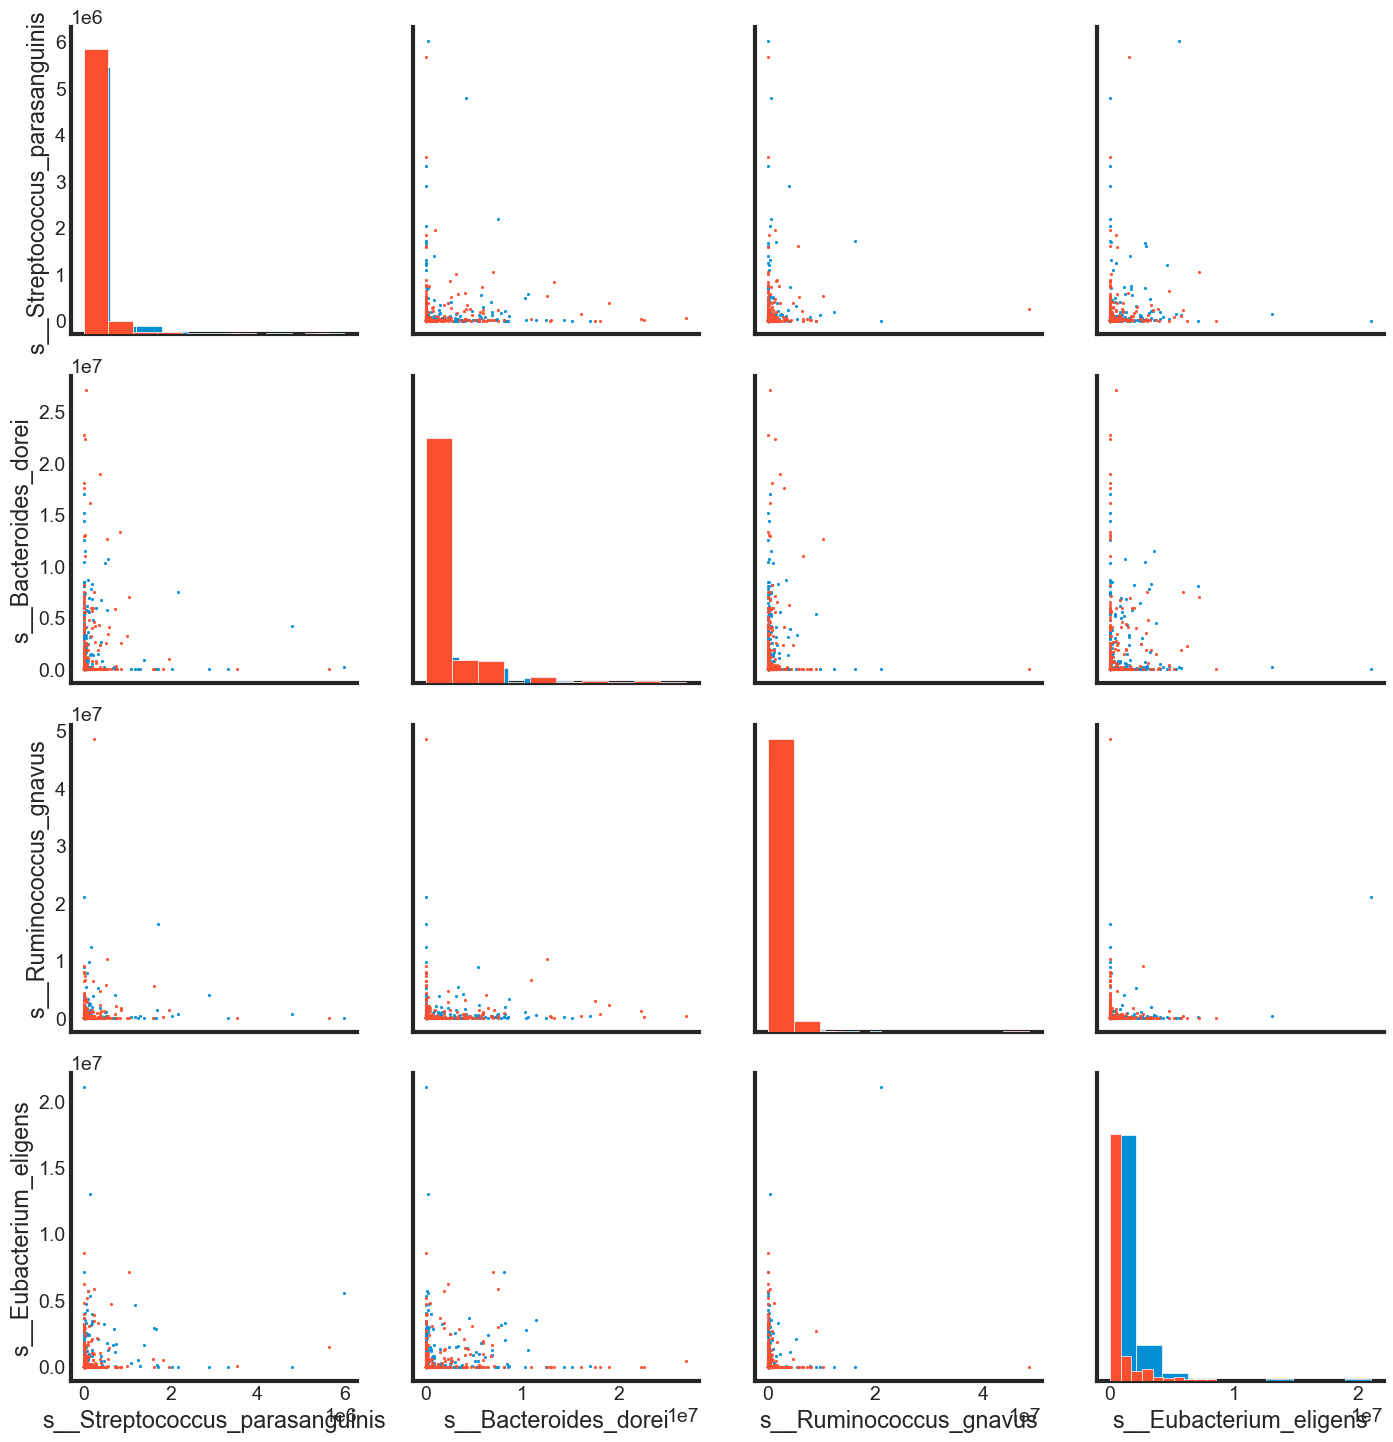

In [22]:
plt.style.use('fivethirtyeight')
sns.set_style("white")

g = sns.PairGrid(data[['disease',
                       's__Streptococcus_parasanguinis', 
                       's__Bacteroides_dorei', 
                       's__Ruminococcus_gnavus', 
                       's__Eubacterium_eligens']],
                 hue='disease')
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter, s = 3)
g.fig.set_size_inches(15, 15)

### Summary

* Relative abundance of *s__Eubacterium_eligens* can be used in classification of the cancer. Larger values of these species tends to show a correlation with CRC patients.

* gut microbiota data is compositional, sparsity and overdispersion. Performing transformation to convert it into Gaussion distribution

## Reference

* [Breast-cancer-risk-prediction](https://github.com/Jean-njoroge/Breast-cancer-risk-prediction)